## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

In [2]:
df = pd.read_csv("/Users/archana/Documents/Santander-RecSys/santander-product-recommendation/cleaned_train_data.csv")

/var/folders/6s/47yqzy6x00x0m1qlmj5mwcv40000gn/T/ipykernel_6301/607431129.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/archana/Documents/Santander-RecSys/santander-product-recommendation/cleaned_train_data.csv")


In [3]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,age_bin,products,n_products
0,2015-01-28,1375586,0,ES,H,35.0,2015-01-12,0,6,1,...,0,1,29.0,MALAGA,1,87218.10,02 - PARTICULARES,30–39,['Current Accounts'],1
1,2015-01-28,1050611,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,13.0,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO,18–29,['Current Accounts'],1
2,2015-01-28,1050612,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,13.0,CIUDAD REAL,0,122179.11,03 - UNIVERSITARIO,18–29,['Current Accounts'],1
3,2015-01-28,1050613,0,ES,H,22.0,2012-08-10,0,35,1,...,0,1,50.0,ZARAGOZA,0,119775.54,03 - UNIVERSITARIO,18–29,['Short-term Deposits'],1
4,2015-01-28,1050614,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,50.0,ZARAGOZA,1,88474.38,03 - UNIVERSITARIO,18–29,['Current Accounts'],1


#### Frequency of each product

In [4]:
def parse_list(x):
    if isinstance(x, str):
        return ast.literal_eval(x)
    return x

df['products'] = df['products'].apply(parse_list)


In [5]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,age_bin,products,n_products
0,2015-01-28,1375586,0,ES,H,35.0,2015-01-12,0,6,1,...,0,1,29.0,MALAGA,1,87218.10,02 - PARTICULARES,30–39,[Current Accounts],1
1,2015-01-28,1050611,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,13.0,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO,18–29,[Current Accounts],1
2,2015-01-28,1050612,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,13.0,CIUDAD REAL,0,122179.11,03 - UNIVERSITARIO,18–29,[Current Accounts],1
3,2015-01-28,1050613,0,ES,H,22.0,2012-08-10,0,35,1,...,0,1,50.0,ZARAGOZA,0,119775.54,03 - UNIVERSITARIO,18–29,[Short-term Deposits],1
4,2015-01-28,1050614,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,50.0,ZARAGOZA,1,88474.38,03 - UNIVERSITARIO,18–29,[Current Accounts],1


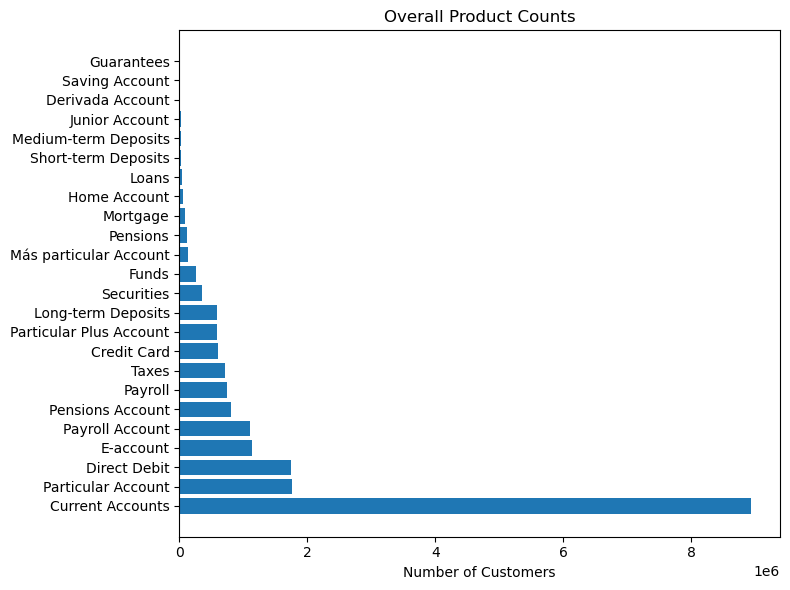

In [6]:

# flatten products field

all_prods = []
for basket in df['products']:
    for p in basket:
        # remove any stray single/double quotes
        clean = p.strip("'\" ")
        all_prods.append(clean)

# frequencies
cnt = Counter(all_prods)
items, freqs = zip(*cnt.most_common())

plt.figure(figsize=(8,6))
plt.barh(items, freqs)
plt.title("Overall Product Counts")
plt.xlabel("Number of Customers")
plt.tight_layout()
plt.show()


Current Accounts is heavily concentrated. Particular/Direct Debit/E-account/Payroll account are the next tier

#### Co-occurrence heatmap

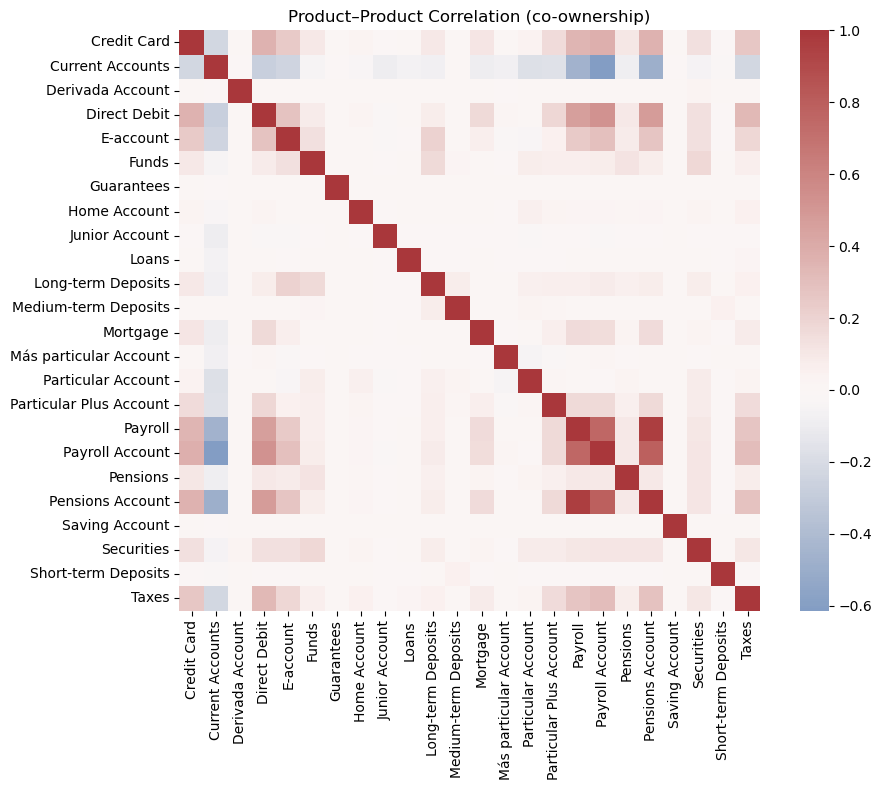

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
prod_mat = pd.DataFrame(mlb.fit_transform(df['products']),
                        columns=mlb.classes_, index=df.index)

corr = prod_mat.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="vlag", center=0, square=True)
plt.title("Product–Product Correlation (co-ownership)")
plt.tight_layout()
plt.show()


Most products have weak correlations. A notable positive cluster exists around payroll-related items (Payroll, Payroll Account, Taxes, Pensions Account)

#### Basket size Distribution

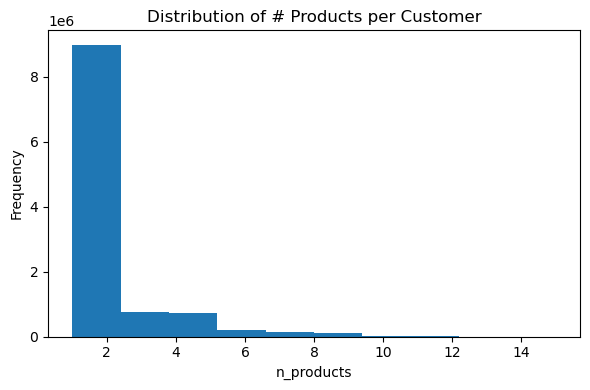

In [8]:
plt.figure(figsize=(6,4))
df['n_products'].plot.hist(bins=10)
plt.title("Distribution of # Products per Customer")
plt.xlabel("n_products")
plt.tight_layout()
plt.show()

Highly skewed: most customers hold 1–2 products; a small tail holds 6+ and a tiny few 10+.

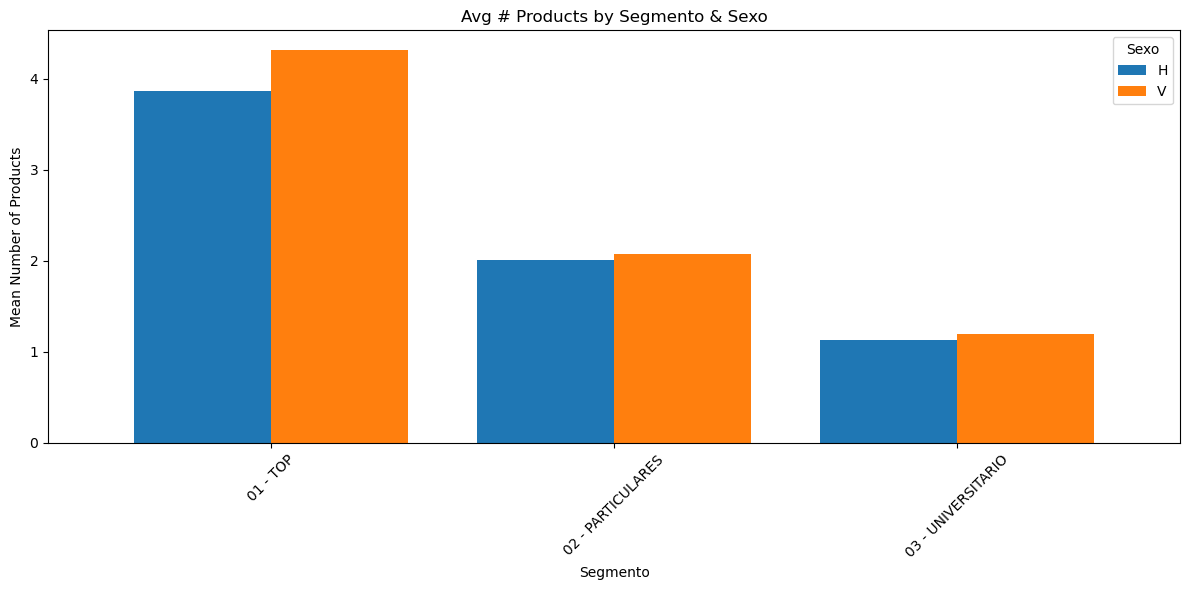

In [9]:
mean_df = df.groupby(['segmento','sexo'])['n_products'].mean().unstack()

mean_df.plot(
    kind='bar',
    figsize=(12,6),
    width=0.8
)
plt.title("Avg # Products by Segmento & Sexo")
plt.xlabel("Segmento")
plt.ylabel("Mean Number of Products")
plt.xticks(rotation=45)
plt.legend(title='Sexo', loc='upper right')
plt.tight_layout()
plt.show()


TOP segment owns approx. twice more products than Particulares and thrice more than Universitario. Within each segment, females (V) hold slightly more products than males (H).

/var/folders/6s/47yqzy6x00x0m1qlmj5mwcv40000gn/T/ipykernel_6301/925986257.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


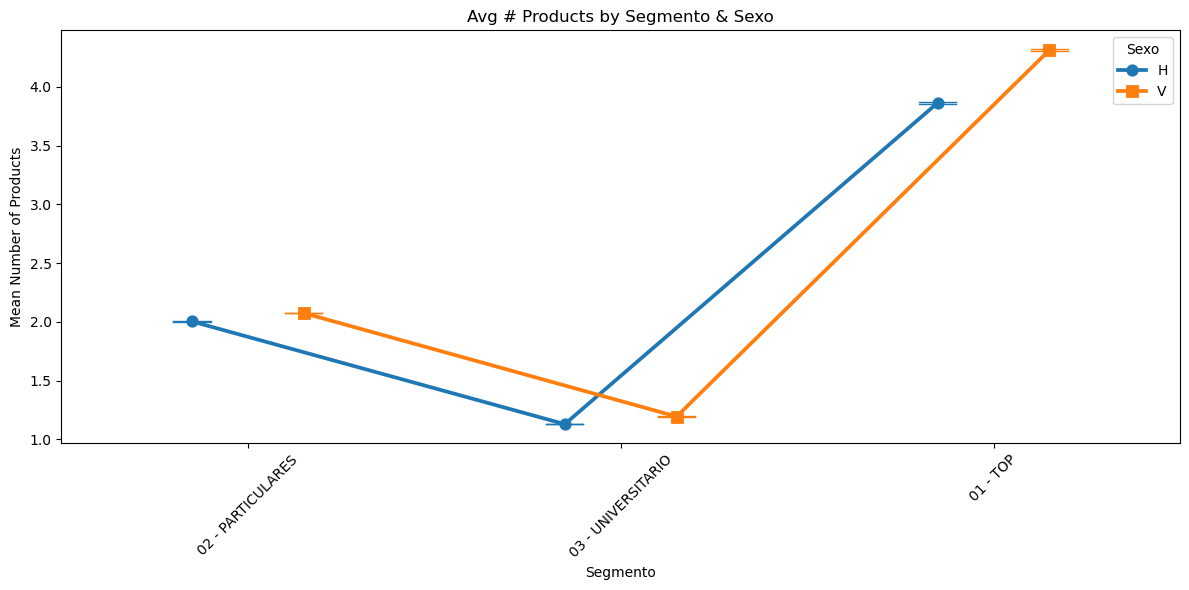

In [10]:
plt.figure(figsize=(12,6))
sns.pointplot(
    data=df,
    x='segmento',
    y='n_products',
    hue='sexo',
    dodge=0.3,
    markers=['o','s'],
    capsize=0.1,
    errwidth=1
)
plt.title("Avg # Products by Segmento & Sexo")
plt.xlabel("Segmento")
plt.ylabel("Mean Number of Products")
plt.xticks(rotation=45)
plt.legend(title='Sexo', loc='upper right')
plt.tight_layout()
plt.show()

TOP >> Particulares >> Universitario, with a mild female lead in each.

/var/folders/6s/47yqzy6x00x0m1qlmj5mwcv40000gn/T/ipykernel_6301/898685492.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


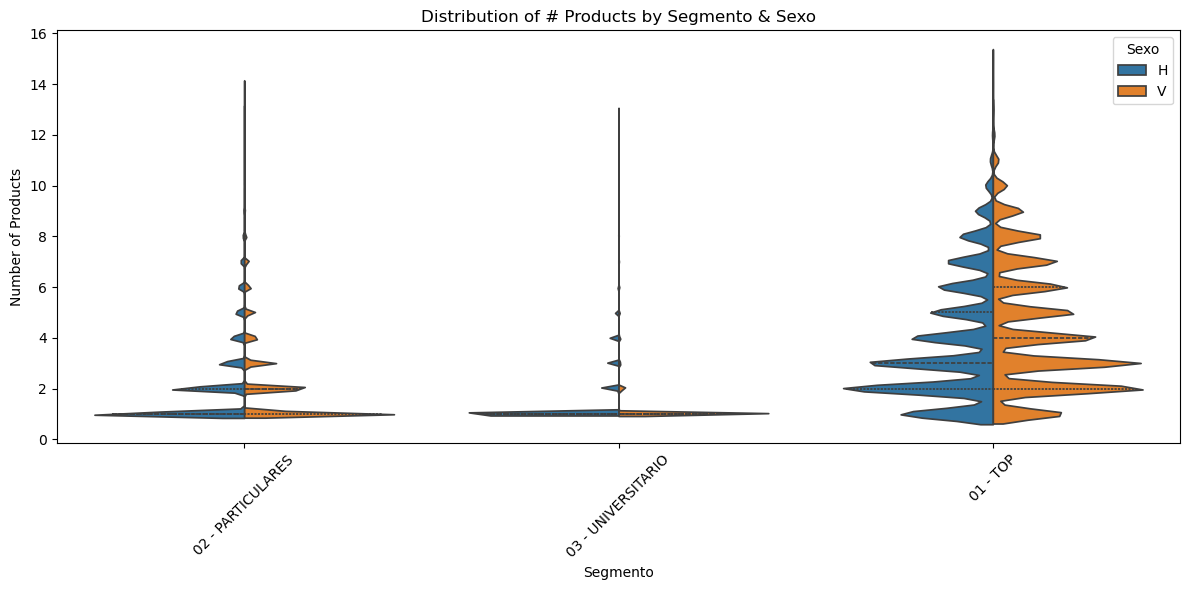

In [11]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=df,
    x='segmento',
    y='n_products',
    hue='sexo',
    split=True,
    inner='quartile',
    scale='width'
)
plt.title("Distribution of # Products by Segmento & Sexo")
plt.xlabel("Segmento")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.legend(title='Sexo', loc='upper right')
plt.tight_layout()
plt.show()

TOP has wide spread (some heavy multi-product users up to ~15). Particulares and Universitario are tightly centered around 1–2 products.

#### Income vs. basket size

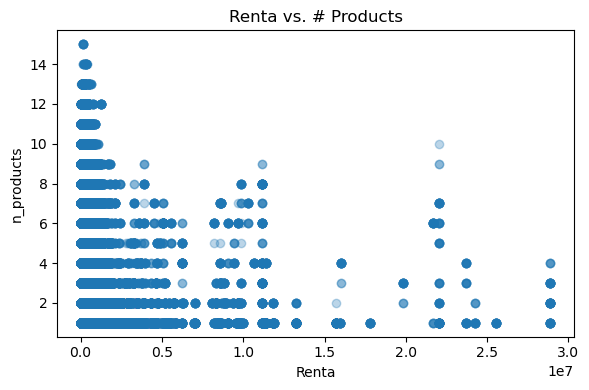

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(df['renta'], df['n_products'], alpha=0.3)
plt.title("Renta vs. # Products")
plt.xlabel("Renta")
plt.ylabel("n_products")
plt.tight_layout()
plt.show()

No obvious linear pattern on raw scale; lots of low-income customers span 1–6 products, and high-income also vary.

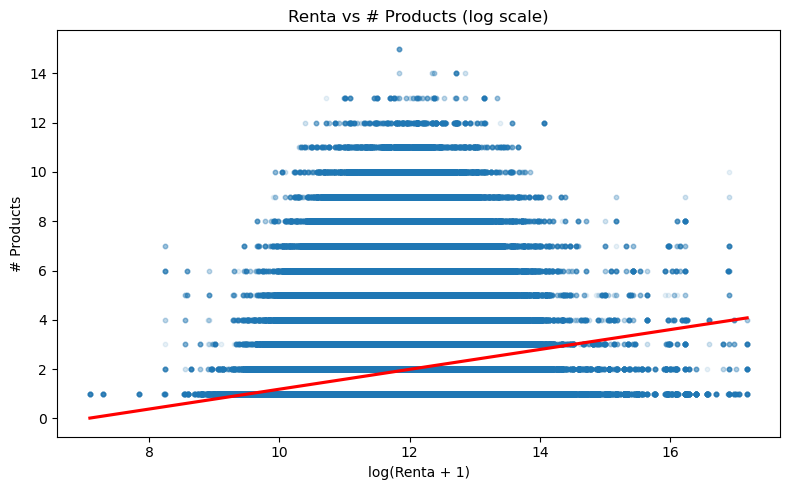

In [13]:
plt.figure(figsize=(8,5))
sns.regplot(
    x=np.log1p(df['renta']),  # log transform to reduce skew
    y='n_products',
    data=df,
    scatter_kws={'alpha':0.1, 's':10},
    line_kws={'color':'red'}
)
plt.title("Renta vs # Products (log scale)")
plt.xlabel("log(Renta + 1)")
plt.ylabel("# Products")
plt.tight_layout()
plt.show()


After log transform, there’s a weak positive trend—higher income is associated with slightly more products.

In [14]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,age_bin,products,n_products
0,2015-01-28,1375586,0,ES,H,35.0,2015-01-12,0,6,1,...,0,1,29.0,MALAGA,1,87218.10,02 - PARTICULARES,30–39,[Current Accounts],1
1,2015-01-28,1050611,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,13.0,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO,18–29,[Current Accounts],1
2,2015-01-28,1050612,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,13.0,CIUDAD REAL,0,122179.11,03 - UNIVERSITARIO,18–29,[Current Accounts],1
3,2015-01-28,1050613,0,ES,H,22.0,2012-08-10,0,35,1,...,0,1,50.0,ZARAGOZA,0,119775.54,03 - UNIVERSITARIO,18–29,[Short-term Deposits],1
4,2015-01-28,1050614,0,ES,V,23.0,2012-08-10,0,35,1,...,0,1,50.0,ZARAGOZA,1,88474.38,03 - UNIVERSITARIO,18–29,[Current Accounts],1


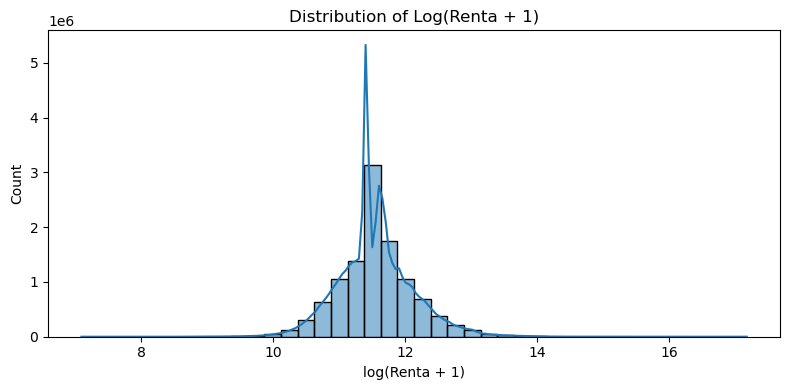

In [15]:
df['log_renta'] = np.log1p(df['renta'])

plt.figure(figsize=(8,4))
sns.histplot(df['log_renta'], kde=True, bins=40)
plt.title("Distribution of Log(Renta + 1)")
plt.xlabel("log(Renta + 1)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Income is roughly log-normal with a strong central mass; a normal-ish shape on log scale indicates heavy right tail in raw income.

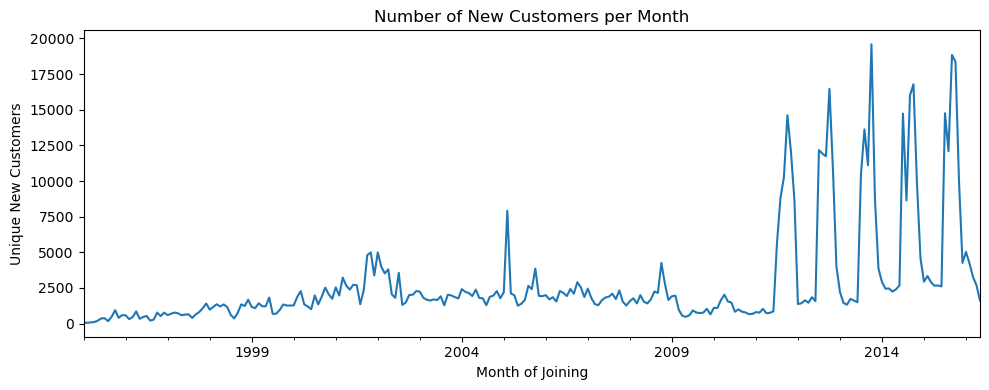

In [16]:
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], errors='coerce')
ts = df.groupby(df['fecha_alta'].dt.to_period('M'))['ncodpers'].nunique()

ts.plot(figsize=(10,4))
plt.title("Number of New Customers per Month")
plt.xlabel("Month of Joining")
plt.ylabel("Unique New Customers")
plt.tight_layout()
plt.show()

Long-run growth with spikes in 2011–2015. Clear seasonality/volatility in later years.

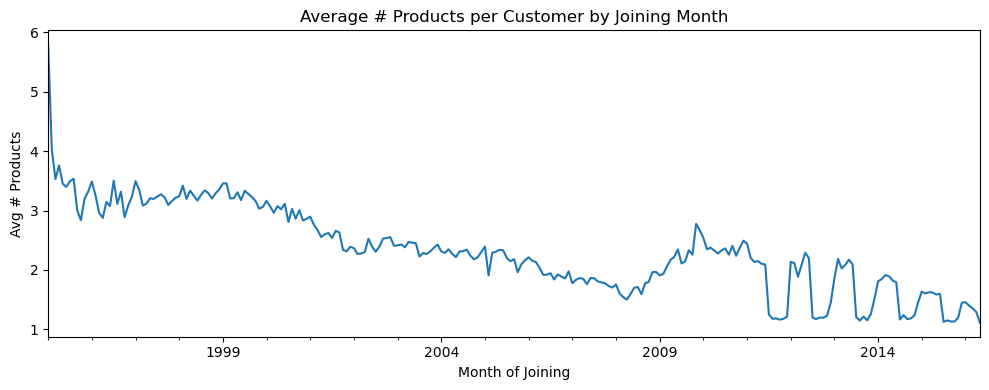

In [17]:
avg_products = df.groupby(df['fecha_alta'].dt.to_period('M'))['n_products'].mean()

avg_products.plot(figsize=(10,4))
plt.title("Average # Products per Customer by Joining Month")
plt.xlabel("Month of Joining")
plt.ylabel("Avg # Products")
plt.tight_layout()
plt.show()


Downward trend: earlier cohorts end up with more products on average. Newer cohorts are lighter users

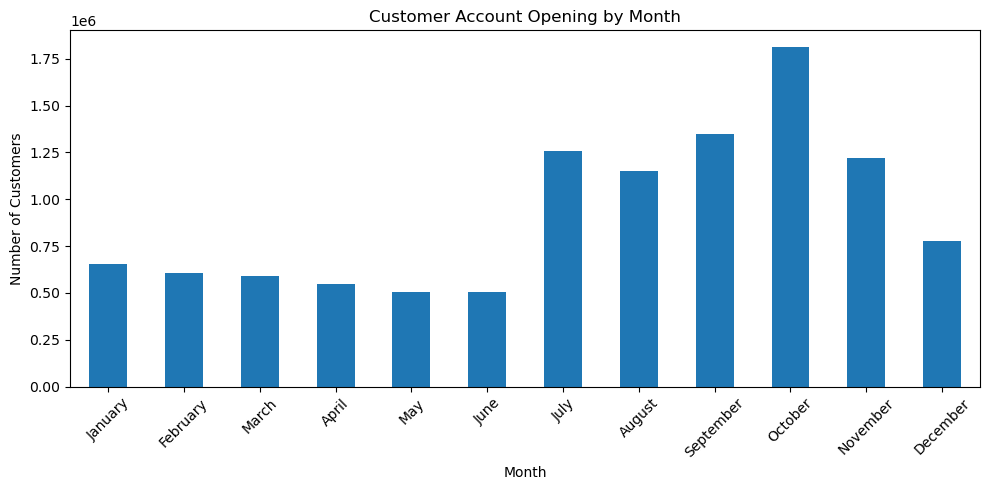

In [18]:

import calendar

# Extract month number and name
df['fecha_alta_month_num'] = df['fecha_alta'].dt.month
df['fecha_alta_month'] = df['fecha_alta'].dt.month_name()

month_counts = df['fecha_alta_month'].value_counts()
month_counts = month_counts.reindex(calendar.month_name[1:])  # Jan → Dec order

plt.figure(figsize=(10,5))
month_counts.plot(kind='bar')
plt.title("Customer Account Opening by Month")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Seasonality: July–November, especially October, sees the most openings. May–June are comparatively softer.

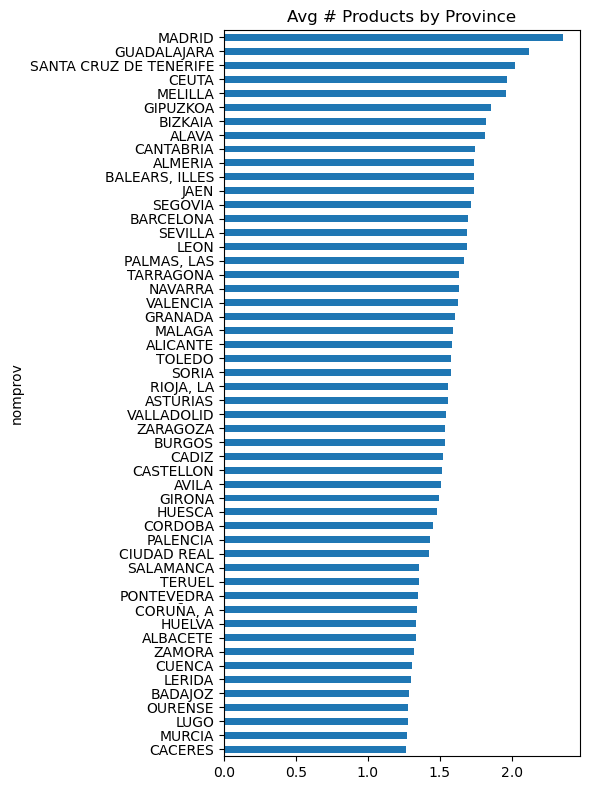

In [19]:
df.groupby('nomprov')['n_products'].mean().sort_values().plot(
    kind='barh', figsize=(6,8))
plt.title("Avg # Products by Province")
plt.tight_layout()
plt.show()

Madrid leads on average product depth; Guadalajara, Tenerife, Ceuta/Melilla also high. Lower averages in provinces like Caceres/Murcia.

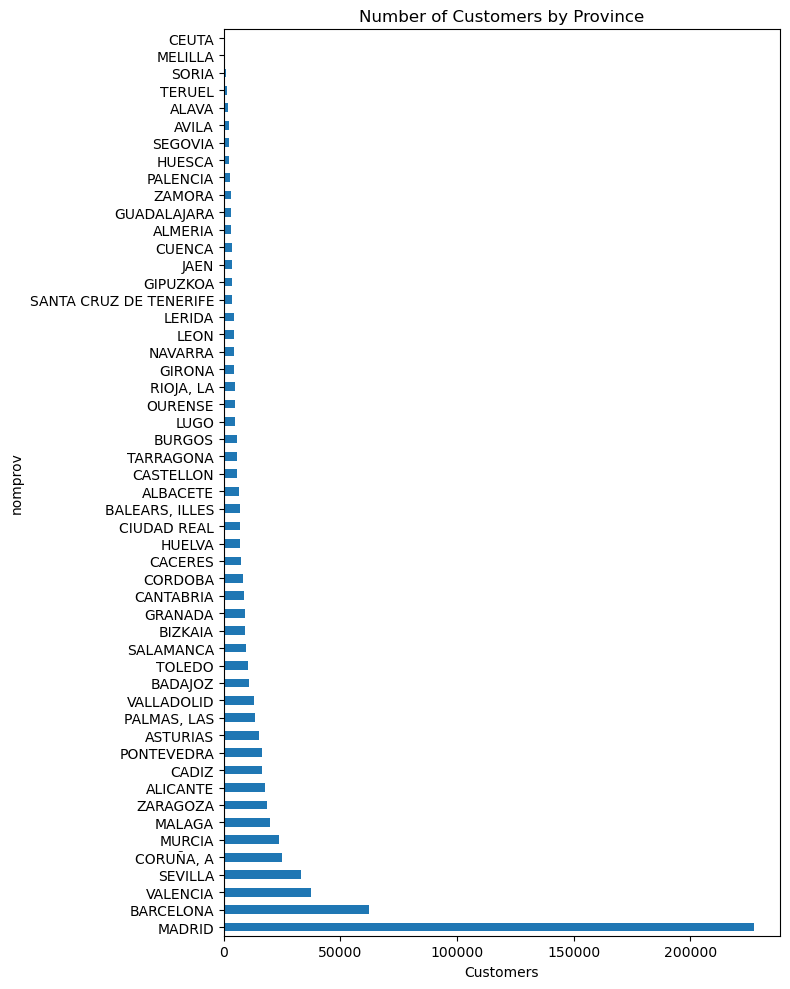

In [20]:
df.groupby('nomprov')['ncodpers'].nunique().sort_values(ascending=False).plot(
    kind='barh', figsize=(8,10))
plt.title("Number of Customers by Province")
plt.xlabel("Customers")
plt.tight_layout()
plt.show()

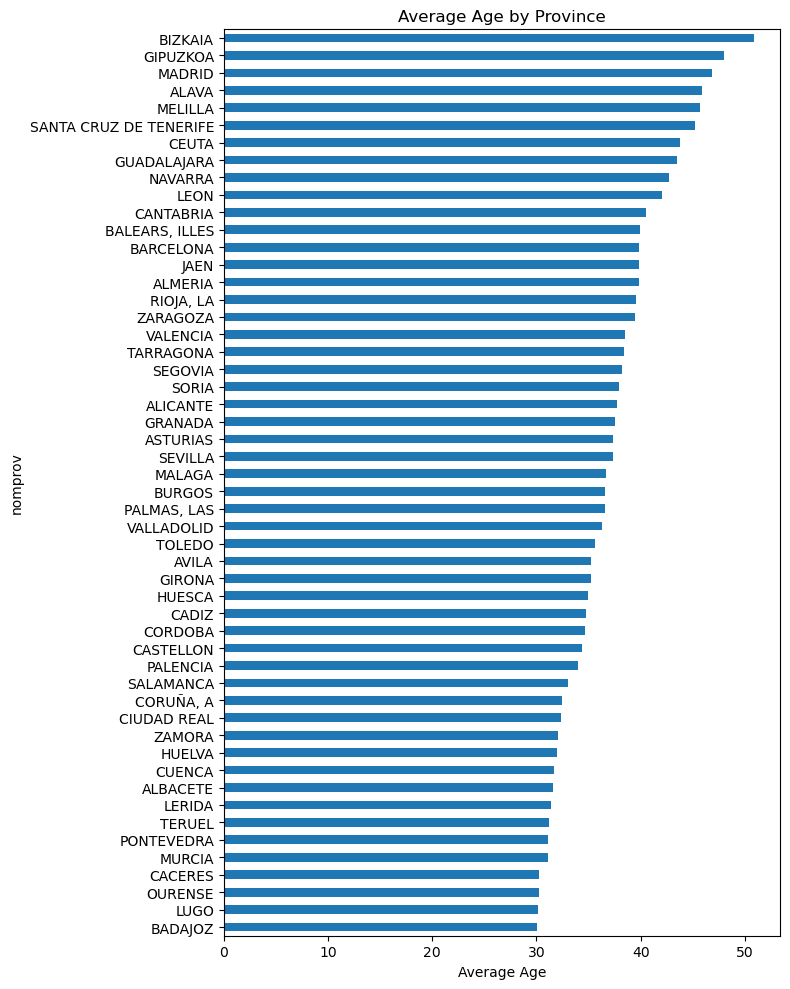

In [21]:
df.groupby('nomprov')['age'].mean().sort_values().plot(
    kind='barh', figsize=(8,10))
plt.title("Average Age by Province")
plt.xlabel("Average Age")
plt.tight_layout()
plt.show()

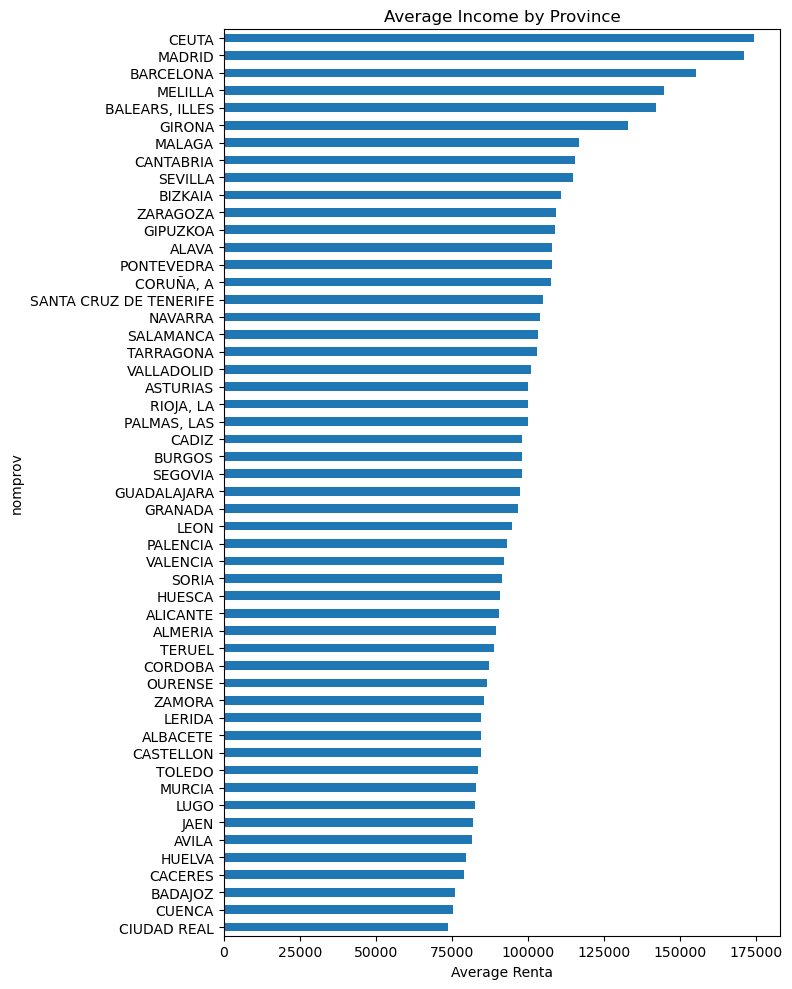

In [22]:
df.groupby('nomprov')['renta'].mean().sort_values().plot(
    kind='barh', figsize=(8,10))
plt.title("Average Income by Province")
plt.xlabel("Average Renta")
plt.tight_layout()
plt.show()

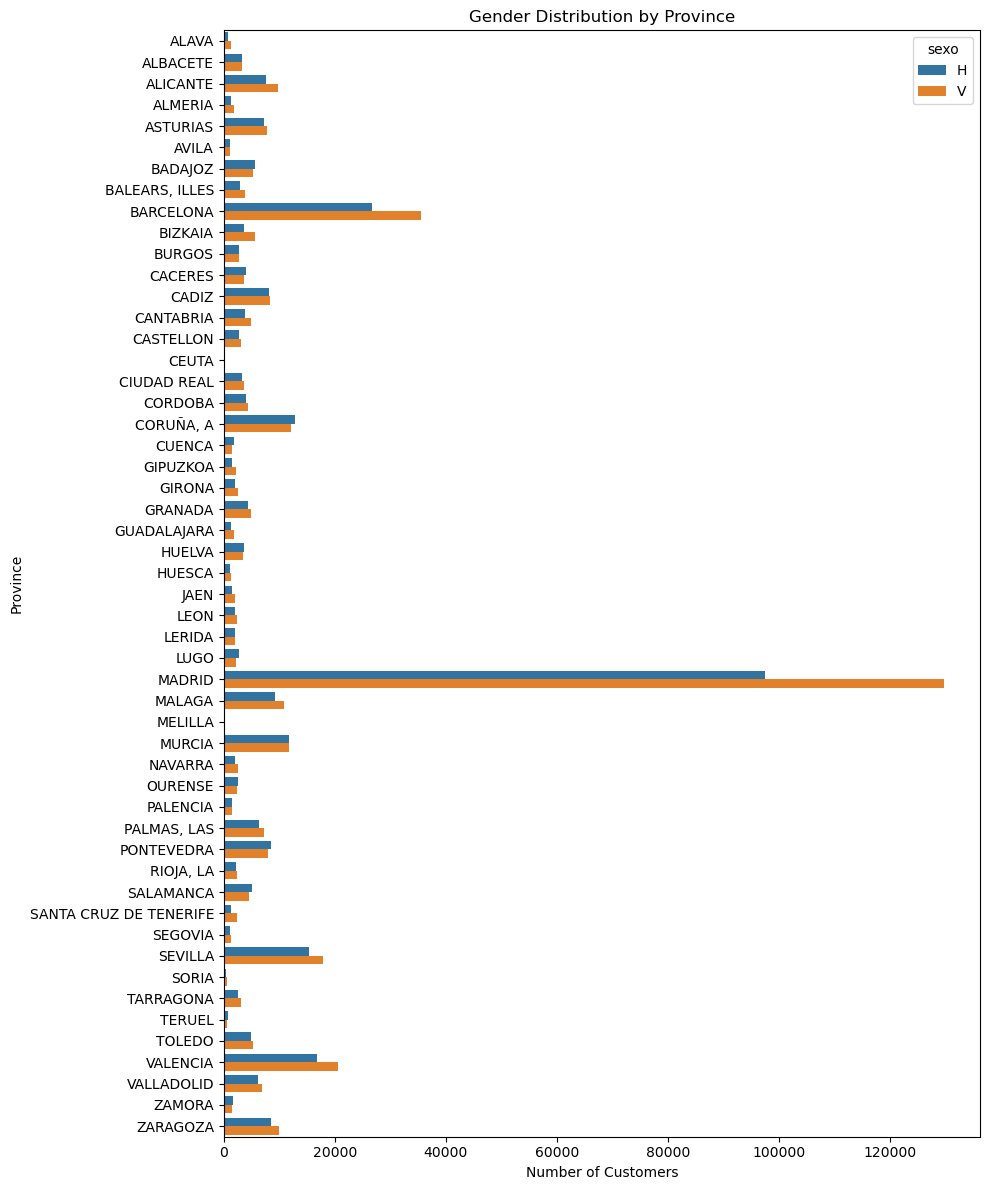

In [23]:
import seaborn as sns

gender_counts = df.groupby(['nomprov','sexo'])['ncodpers'].nunique().reset_index()
plt.figure(figsize=(10,12))
sns.barplot(data=gender_counts, x='ncodpers', y='nomprov', hue='sexo')
plt.title("Gender Distribution by Province")
plt.xlabel("Number of Customers")
plt.ylabel("Province")
plt.tight_layout()
plt.show()

Slight female majority overall; the pattern holds across most provinces (Madrid especially). Gender mix is fairly balanced but often tips toward females.

In [24]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,nomprov,ind_actividad_cliente,renta,segmento,age_bin,products,n_products,log_renta,fecha_alta_month_num,fecha_alta_month
0,2015-01-28,1375586,0,ES,H,35.0,2015-01-12,0,6,1,...,MALAGA,1,87218.10,02 - PARTICULARES,30–39,[Current Accounts],1,11.376179,1,January
1,2015-01-28,1050611,0,ES,V,23.0,2012-08-10,0,35,1,...,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO,18–29,[Current Accounts],1,10.478688,8,August
2,2015-01-28,1050612,0,ES,V,23.0,2012-08-10,0,35,1,...,CIUDAD REAL,0,122179.11,03 - UNIVERSITARIO,18–29,[Current Accounts],1,11.713252,8,August
3,2015-01-28,1050613,0,ES,H,22.0,2012-08-10,0,35,1,...,ZARAGOZA,0,119775.54,03 - UNIVERSITARIO,18–29,[Short-term Deposits],1,11.693383,8,August
4,2015-01-28,1050614,0,ES,V,23.0,2012-08-10,0,35,1,...,ZARAGOZA,1,88474.38,03 - UNIVERSITARIO,18–29,[Current Accounts],1,11.390480,8,August


In [ ]:
import ast

age_order = ["18-29","30-39","40-49","50-59","60-69","70-79","80-100"]
df['age_bin'] = (
    df['age_bin'].astype(str)
                 .str.replace('\u2013','-', regex=False)  # en dash → hyphen
                 .str.strip()
)
df['age_bin'] = pd.Categorical(df['age_bin'], categories=age_order, ordered=True)

In [ ]:
def to_list(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            v = ast.literal_eval(x)
            return v if isinstance(v, list) else [str(v)]
        except Exception:
            x = x.strip().strip('[]')
            return [s.strip(" '\"") for s in x.split(',') if s.strip()]
    return []

df['products'] = df['products'].apply(to_list)

In [ ]:
long = (
    df[['age_bin','products']]
      .dropna(subset=['age_bin'])
      .explode('products')
      .rename(columns={'products':'product'})
)
long['product'] = long['product'].astype(str).str.strip()
long = long[long['product'] != '']  # drop empties

topk = long['product'].value_counts().nlargest(10).index
long_top = long[long['product'].isin(topk)]

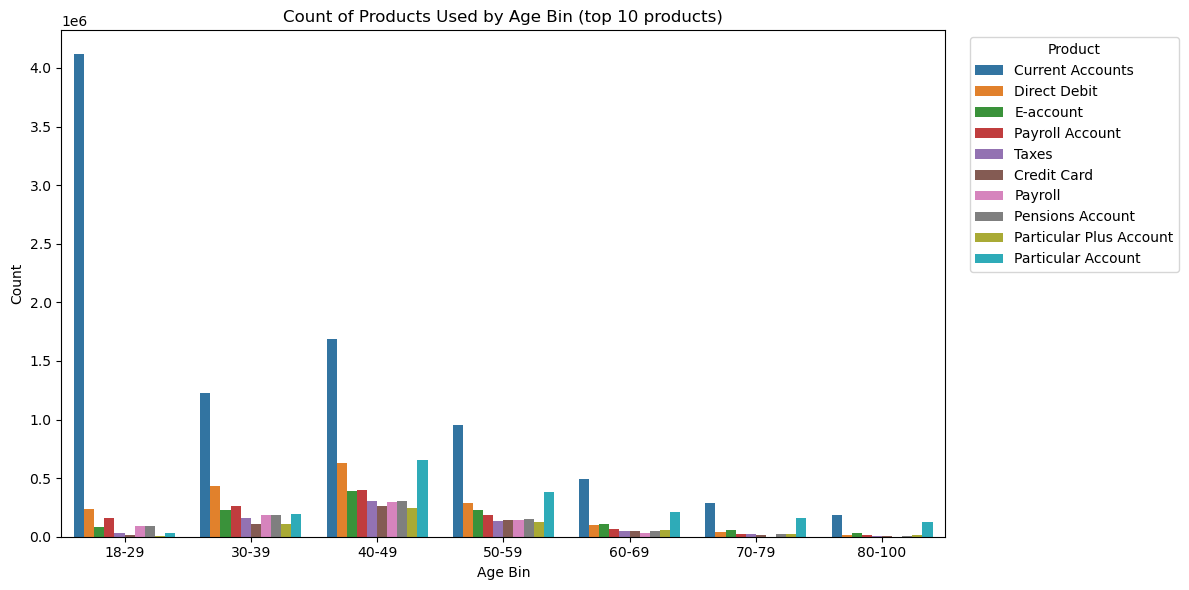

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=long_top,
    x='age_bin',
    hue='product',
    order=age_order
)
plt.title("Count of Products Used by Age Bin (top 10 products)")
plt.xlabel("Age Bin")
plt.ylabel("Count")
plt.legend(title="Product", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


Current Accounts dominate all ages. Direct Debit, Payroll Account, and Taxes peak in working-age (30–49). Pensions/Pensions Account rise after ~60. “Particular” accounts are strong in 40–59.

/var/folders/6s/47yqzy6x00x0m1qlmj5mwcv40000gn/T/ipykernel_6301/606533068.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  long.groupby(['age_bin', 'product'])


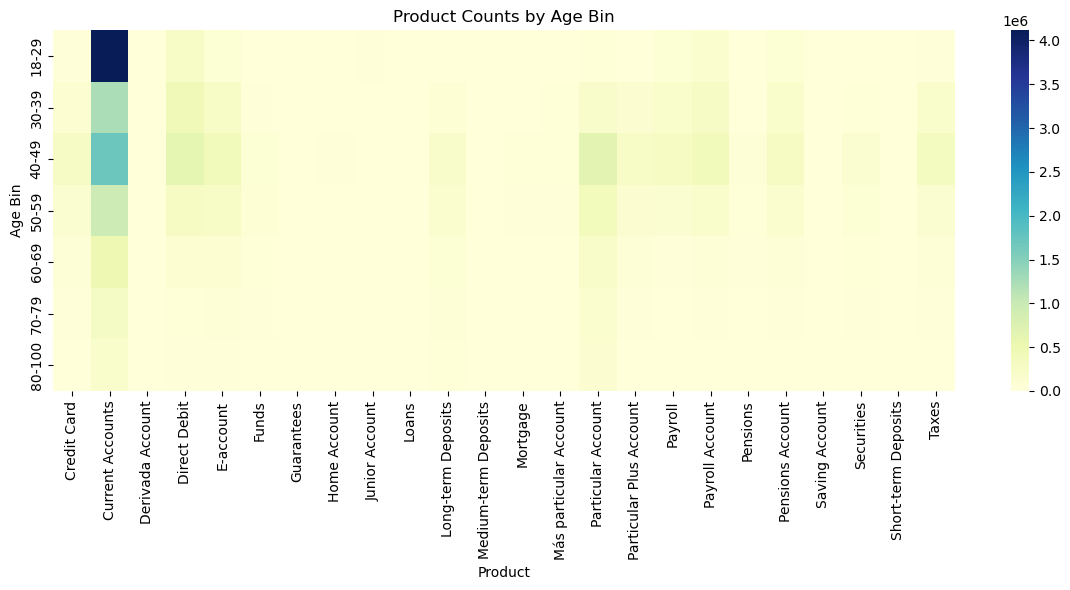

In [26]:
heat = (
    long.groupby(['age_bin', 'product'])
        .size()
        .unstack(fill_value=0)
        .loc[age_order]  # keep correct order
)

plt.figure(figsize=(12,6))
sns.heatmap(heat, cmap="YlGnBu",fmt='d')
plt.title("Product Counts by Age Bin")
plt.xlabel("Product")
plt.ylabel("Age Bin")
plt.tight_layout()
plt.show()


In [27]:
df.to_csv('/Users/archana/Documents/Santander-RecSys/santander-product-recommendation/large_train_data.csv', index=False)

In [31]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,age_bin,products
0,2015-01-28,1375586,0,ES,H,35.0,2015-01-12,0,6,1,...,KHL,0,1,29.0,MALAGA,1,87218.10,02 - PARTICULARES,30-39,[Current Accounts]
1,2015-01-28,1050611,0,ES,V,23.0,2012-08-10,0,35,1,...,KHE,0,1,13.0,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO,18-29,[Current Accounts]
2,2015-01-28,1050612,0,ES,V,23.0,2012-08-10,0,35,1,...,KHE,0,1,13.0,CIUDAD REAL,0,122179.11,03 - UNIVERSITARIO,18-29,[Current Accounts]
3,2015-01-28,1050613,0,ES,H,22.0,2012-08-10,0,35,1,...,KHD,0,1,50.0,ZARAGOZA,0,119775.54,03 - UNIVERSITARIO,18-29,[Short-term Deposits]
4,2015-01-28,1050614,0,ES,V,23.0,2012-08-10,0,35,1,...,KHE,0,1,50.0,ZARAGOZA,1,88474.38,03 - UNIVERSITARIO,18-29,[Current Accounts]


In [30]:
df = df.drop(["n_products","log_renta",'fecha_alta_month_num','fecha_alta_month'], axis = 1)

In [32]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,age_bin,products
0,2015-01-28,1375586,0,ES,H,35.0,2015-01-12,0,6,1,...,KHL,0,1,29.0,MALAGA,1,87218.10,02 - PARTICULARES,30-39,[Current Accounts]
1,2015-01-28,1050611,0,ES,V,23.0,2012-08-10,0,35,1,...,KHE,0,1,13.0,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO,18-29,[Current Accounts]
2,2015-01-28,1050612,0,ES,V,23.0,2012-08-10,0,35,1,...,KHE,0,1,13.0,CIUDAD REAL,0,122179.11,03 - UNIVERSITARIO,18-29,[Current Accounts]
3,2015-01-28,1050613,0,ES,H,22.0,2012-08-10,0,35,1,...,KHD,0,1,50.0,ZARAGOZA,0,119775.54,03 - UNIVERSITARIO,18-29,[Short-term Deposits]
4,2015-01-28,1050614,0,ES,V,23.0,2012-08-10,0,35,1,...,KHE,0,1,50.0,ZARAGOZA,1,88474.38,03 - UNIVERSITARIO,18-29,[Current Accounts]


In [33]:
df.shape

(10974687, 24)

In [34]:
df.to_csv('/Users/archana/Documents/Santander-RecSys/santander-product-recommendation/final_train_data.csv', index=False)